Investigation into AirBnB prices in Boston and Seattle

In [1]:
#read in packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import scipy.stats as sc

In [8]:
#Initial investigation of Seattle data and clean up of nulls and unnecessary characters: for investigation into
#whether ratings can be used to predict price
dfListingsSeattle = pd.read_csv('/Users/clarissa/Documents/NanoDegree/seattle/listings.csv')

#get a list of columns in order to get drop unnecessary columns
describeListingsSeattle = dfListingsSeattle.columns

dfListingsReviewsSeattle = dfListingsSeattle[['price', 'weekly_price', 'monthly_price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
dfCountRow = dfListingsReviewsSeattle.count()
dfCountNull = dfListingsReviewsSeattle.isnull().sum()

#large amount of nulls in weekly and monthly prince so will drop columns
dfListingsReviewsSeattle = dfListingsReviewsSeattle[['price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

#drop remaining nulls as their aren't too many and interpolation doesn't make much sense without other factors being considered
dfListingsReviewsSeattle = dfListingsReviewsSeattle.dropna(axis=0, subset=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], how = 'any')

#clean up price column as it contains $ and , which mean datatype cannot be numerical
dfListingsReviewsSeattle.loc[:, 'price'] = dfListingsReviewsSeattle['price'].str.replace("$", "")
dfListingsReviewsSeattle.loc[:, 'price'] = dfListingsReviewsSeattle['price'].str.replace(r",","")
dfListingsReviewsSeattle.loc[:, 'price'] = dfListingsReviewsSeattle['price'].astype(float)

print(dfListingsReviewsSeattle)

      price  review_scores_rating  review_scores_accuracy  \
0      85.0                  95.0                    10.0   
1     150.0                  96.0                    10.0   
2     975.0                  97.0                    10.0   
4     450.0                  92.0                     9.0   
5     120.0                  95.0                    10.0   
...     ...                   ...                     ...   
3810  154.0                  92.0                     9.0   
3811   65.0                 100.0                     9.0   
3812   95.0                  96.0                    10.0   
3813  359.0                  80.0                     8.0   
3814   79.0                 100.0                    10.0   

      review_scores_cleanliness  review_scores_checkin  \
0                          10.0                   10.0   
1                          10.0                   10.0   
2                          10.0                   10.0   
4                           9.0    

In [3]:
#Now data is filtred and cleaned up can first look at whether the price and reviews are correlated
corr = dfListingsReviewsSeattle.corr(method='pearson')
print(corr)

                                price  review_scores_rating  \
price                        1.000000              0.054958   
review_scores_rating         0.054958              1.000000   
review_scores_accuracy       0.018783              0.622438   
review_scores_cleanliness    0.054069              0.642380   
review_scores_checkin        0.007853              0.521914   
review_scores_communication  0.010100              0.543626   
review_scores_location       0.074600              0.368714   
review_scores_value         -0.041563              0.696288   

                             review_scores_accuracy  \
price                                      0.018783   
review_scores_rating                       0.622438   
review_scores_accuracy                     1.000000   
review_scores_cleanliness                  0.544217   
review_scores_checkin                      0.407205   
review_scores_communication                0.423786   
review_scores_location                     0.26

In [9]:
#While correlations are low lets continue to see if any of these scores could be used to predict price
X = dfListingsReviewsSeattle[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

y = dfListingsReviewsSeattle['price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

#apply model
lm_model = LinearRegression(normalize=True)  # Instantiate
lm_model.fit(X_train, y_train)  # Fit

# Predict and score the model
y_test_preds = lm_model.predict(X_test)

#get r score
RscoreSeattle = r2_score(y_test, y_test_preds)
print(RscoreSeattle)


0.014350710890825957


In [11]:
#Set up new DF to investigate relationship betweeb ==
dfRoomsSeattle = dfListingsSeattle[['id', 'price', 'accommodates', 'bedrooms', 'bathrooms']]
dfRoomsSeattle = dfRoomsSeattle.set_index('id')

#clean up price columns
#clean up price column
dfRoomsSeattle.loc[:, 'price'] = dfRoomsSeattle['price'].str.replace("$", "")
dfRoomsSeattle.loc[:, 'price'] = dfRoomsSeattle['price'].str.replace(r",","")
dfRoomsSeattle.loc[:, 'price'] = dfRoomsSeattle['price'].astype(float)

#count nulls to see how best to deal with them
dfCountNull = dfRoomsSeattle.isnull().sum()
#very few nulls so just drop them
dfRoomsSeattle = dfRoomsSeattle.dropna(axis=0, how='any')
print(dfRoomsSeattle)


          price  accommodates  bedrooms  bathrooms
id                                                
241032     85.0             4       1.0        1.0
953595    150.0             4       1.0        1.0
3308979   975.0            11       5.0        4.5
7421966   100.0             3       0.0        1.0
278830    450.0             6       3.0        2.0
...         ...           ...       ...        ...
8101950   359.0             6       3.0        2.0
8902327    79.0             4       1.0        1.0
10267360   93.0             2       1.0        1.0
9604740    99.0             2       0.0        1.0
10208623   87.0             3       2.0        1.5

[3796 rows x 4 columns]


In [12]:
#Check out whether any included measures are correlated
corr = dfRoomsSeattle.corr(method='pearson')
print(corr)

                 price  accommodates  bedrooms  bathrooms
price         1.000000      0.651988  0.628169   0.516493
accommodates  0.651988      1.000000  0.771654   0.538664
bedrooms      0.628169      0.771654  1.000000   0.610937
bathrooms     0.516493      0.538664  0.610937   1.000000


In [13]:
X = dfRoomsSeattle[['accommodates', 'bedrooms', 'bathrooms']]
X.reset_index(drop=True, inplace=True)
y = dfRoomsSeattle[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

#apply model
lm_model = LinearRegression(normalize=True)  # Instantiate
lm_model.fit(X_train, y_train)  # Fit

# Predict and score the model
y_test_preds = lm_model.predict(X_test)

#get r score
RscoreSeattle = r2_score(y_test, y_test_preds)
print(RscoreSeattle)

0.4843539870914997


In [15]:
dfListingsBoston = pd.read_csv('/Users/clarissa/Documents/NanoDegree/boston/listings.csv')

#describeListings = dfListings.describe()
#trim dataframe to necessary columns
dfListingsReviewsBoston = dfListingsBoston[['id', 'price', 'weekly_price', 'monthly_price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
dfCountRow = dfListingsReviewsBoston.count()

dfCountNull = dfListingsReviewsBoston.isnull().sum()
#print(dfCountRow)
#looking at the counts there are clearly a lot of nulls

#large amount of nulls in weekly and monthly prince so will drop columns
dfListingsReviewsBoston = dfListingsReviewsBoston[['price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

#drop columns where all ratings are null
dfListingsReviewsBoston = dfListingsReviewsBoston.dropna(axis=0, subset=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], how = 'any')

#clean up the price columns
dfListingsReviewsBoston.loc[:, 'price'] = dfListingsReviewsBoston['price'].str.replace("$", "")
dfListingsReviewsBoston.loc[:, 'price'] = dfListingsReviewsBoston['price'].str.replace(r",","")
dfListingsReviewsBoston.loc[:, 'price'] = dfListingsReviewsBoston['price'].astype(float)

print(dfListingsReviewsBoston)

      price  review_scores_rating  review_scores_accuracy  \
1      65.0                  94.0                    10.0   
2      65.0                  98.0                    10.0   
3      75.0                 100.0                    10.0   
4      79.0                  99.0                    10.0   
5      75.0                 100.0                    10.0   
...     ...                   ...                     ...   
3574   68.0                  80.0                     8.0   
3575   69.0                  70.0                     8.0   
3578   85.0                 100.0                    10.0   
3580   69.0                  90.0                    10.0   
3583   65.0                  90.0                     9.0   

      review_scores_cleanliness  review_scores_checkin  \
1                           9.0                   10.0   
2                           9.0                   10.0   
3                          10.0                   10.0   
4                          10.0    

In [8]:
#Now to look at the correlations as done previously
corr = dfListingsReviewsBoston.corr(method='pearson')
print(corr)

                                price  review_scores_rating  \
price                        1.000000              0.107456   
review_scores_rating         0.107456              1.000000   
review_scores_accuracy       0.041541              0.705336   
review_scores_cleanliness    0.146062              0.756364   
review_scores_checkin       -0.003513              0.584612   
review_scores_communication  0.005360              0.600403   
review_scores_location       0.194026              0.459791   
review_scores_value          0.013243              0.786699   

                             review_scores_accuracy  \
price                                      0.041541   
review_scores_rating                       0.705336   
review_scores_accuracy                     1.000000   
review_scores_cleanliness                  0.644697   
review_scores_checkin                      0.468393   
review_scores_communication                0.492961   
review_scores_location                     0.32

In [13]:
X = dfListingsReviewsBoston[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

y = dfListingsReviewsBoston['price']


# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

#apply model
lm_model = LinearRegression(normalize=True)  # Instantiate
lm_model.fit(X_train, y_train)  # Fit

# Predict and score the model
y_test_preds = lm_model.predict(X_test)

#get r score
Rscore = r2_score(y_test, y_test_preds)
print(Rscore)




0.07960652680184144
                       est_int      coefs  abs_coefs
5       review_scores_location  25.919954  25.919954
6          review_scores_value -25.084573  25.084573
2    review_scores_cleanliness  16.984319  16.984319
3        review_scores_checkin -14.705736  14.705736
1       review_scores_accuracy  -8.496034   8.496034
4  review_scores_communication  -4.078865   4.078865
0         review_scores_rating   2.176032   2.176032


In [10]:
dfRoomsBoston = dfListingsBoston[['id', 'price', 'accommodates', 'bedrooms', 'bathrooms']]
dfRoomsBoston = dfRoomsBoston.set_index('id')

#count nulls to see how best to deal with them
dfCountNull = dfRoomsBoston.isnull().sum()
#very few nulls so just drop them
dfRoomsBoston = dfRoomsBoston.dropna(axis=0, how='any')


#clean up price column
dfRoomsBoston.loc[:, 'price'] = dfRoomsBoston['price'].str.replace("$", "")
dfRoomsBoston.loc[:, 'price'] = dfRoomsBoston['price'].str.replace(r",","")
dfRoomsBoston.loc[:, 'price'] = dfRoomsBoston['price'].astype(float)

print(dfRoomsBoston)

          price  accommodates  bedrooms  bathrooms
id                                                
12147973  250.0             4       2.0        1.5
3075044    65.0             2       1.0        1.0
6976       65.0             2       1.0        1.0
1436513    75.0             4       1.0        1.0
7651065    79.0             2       1.0        1.5
...         ...           ...       ...        ...
8373729    69.0             3       1.0        1.0
14844274  150.0             2       1.0        1.0
14585486  198.0             4       1.0        1.0
14603878   65.0             2       1.0        1.0
14504422   65.0             2       1.0        1.0

[3561 rows x 4 columns]


In [11]:
#time to look at correlations
corr = dfRoomsBoston.corr(method='pearson')
print(corr)

                 price  accommodates  bedrooms  bathrooms
price         1.000000      0.437756  0.384853   0.248699
accommodates  0.437756      1.000000  0.725089   0.346448
bedrooms      0.384853      0.725089  1.000000   0.430854
bathrooms     0.248699      0.346448  0.430854   1.000000


In [23]:
X = dfRoomsBoston[['accommodates', 'bedrooms', 'bathrooms']]
X.reset_index(drop=True, inplace=True)
y = dfRoomsBoston[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

#apply model
lm_model = LinearRegression(normalize=True)  # Instantiate
lm_model.fit(X_train, y_train)  # Fit

# Predict and score the model
y_test_preds = lm_model.predict(X_test)

#get r score
Rscore = r2_score(y_test, y_test_preds)
print(Rscore)


0.26678473538724456


In [16]:
#First lets create the required dataframes to investigate this
#I've decided to include the number of people each flat accommodates in order to possibly use this for further
#investigation as it was the measurement that correlated most strongly with price for both cities

dfListingsBoston = dfListingsBoston[['price', 'accommodates']]
dfListingsBoston.loc[:, 'price'] = dfListingsBoston['price'].str.replace("$", "")
dfListingsBoston.loc[:, 'price'] = dfListingsBoston['price'].str.replace(r",","")
dfListingsBoston.loc[:, 'price'] = dfListingsBoston['price'].astype(float)
#no nulls
dfCountNullBoston = dfListingsBoston.isnull().sum()
#print((dfCountNullBoston))

dfListingsSeattle = dfListingsSeattle[['price', 'accommodates']]
describeSeattle = dfListingsSeattle['accommodates'].describe()
dfListingsSeattle.loc[:, 'price'] = dfListingsSeattle['price'].str.replace("$", "")
dfListingsSeattle.loc[:, 'price'] = dfListingsSeattle['price'].str.replace(r",","")
dfListingsSeattle.loc[:, 'price'] = dfListingsSeattle['price'].astype(float)
#no nulls
dfCountNullBoston = dfListingsBoston.isnull().sum()

In [18]:
#Now lets look at the descriptive stats for both locations
describeSeattleAccommodates = dfListingsSeattle['accommodates'].describe()
describeSeattlePrice = dfListingsSeattle['price'].describe()
describeBostonAccommodate = dfListingsBoston['accommodates'].describe()
describeBostonPrice = dfListingsBoston['price'].describe()
print(describeSeattleAccommodates)
print(describeSeattlePrice)
print(describeBostonAccommodate)
print(describeBostonPrice)

count    3818.000000
mean        3.349398
std         1.977599
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: accommodates, dtype: float64
count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64
count    3585.000000
mean        3.041283
std         1.778929
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        16.000000
Name: accommodates, dtype: float64
count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64


  descriptive_stats  price_seattle  price_boston
0             count    3818.000000   3585.000000
1              mean     127.976166    173.925802
2               std      90.250022    148.331321
3               min      20.000000     10.000000
4               25%      75.000000     85.000000
5               50%     100.000000    150.000000
6               75%     150.000000    220.000000
7               max    1000.000000   4000.000000


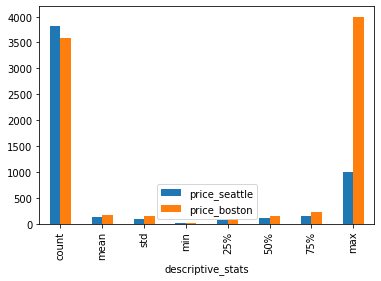

In [20]:
data = {'descriptive_stats': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
         'price_seattle': [3818.000000, 127.976166, 90.250022, 20.000000, 75.000000, 100.000000, 150.000000, 1000.000000],
         'price_boston': [3585.000000, 173.925802, 148.331321, 10.000000, 85.000000, 150.000000, 220.000000, 4000.000000]}
dfDescribePlot = pd.DataFrame(data)
print(dfDescribePlot)
dfDescribePlot.plot(x='descriptive_stats', y=['price_seattle', 'price_boston'], kind='bar')
plt.ioff()
plt.show()

Looking at the desriptive stats the average number of people each property accommodates is very similar yet
there is a clear difference between average cost with Boston have higher average price than Seatle

In [21]:
# to further look at this lets see if the means of price statistically differ from one another
t, p = sc.ttest_ind(dfListingsSeattle['price'], dfListingsBoston['price'], equal_var=False)
print("ttest_ind between two locations:            t = %g  p = %g" % (t, p))

ttest_ind between two locations:            t = -15.9777  p = 2.80437e-56


Clearly are different from one another. However lets break this down and see if this difference is consistent across 
properties that are able to accommodate a different number of guests. Since there is a large range of number
of people that can be accommodated across properties (1-16) so will create 3 subgroups to compare

In [22]:
#first split up the Boston data
dfBoston1 = dfListingsBoston.loc[dfListingsBoston['accommodates'] == 1]
dfBoston1Describe = dfBoston1.describe()
dfBoston5 = dfListingsBoston.loc[(dfListingsBoston['accommodates'] <= 5) & (dfListingsBoston['accommodates'] > 1)]
dfBoston5Describe = dfBoston5.describe()
dfBoston10 = dfListingsBoston.loc[(dfListingsBoston['accommodates'] > 5) & (dfListingsBoston['accommodates'] <= 10)]
dfBoston10Describe = dfBoston10.describe()

#then split up the Seatle data
dfSeattle1 = dfListingsSeattle.loc[dfListingsSeattle['accommodates'] == 1]
dfSeattle1Describe = dfSeattle1.describe()
dfSeattle5 = dfListingsSeattle.loc[(dfListingsSeattle['accommodates'] <= 5) & (dfListingsSeattle['accommodates'] > 1)]
dfSeattle5Describe = dfSeattle5.describe()
dfSeattle10 = dfListingsSeattle.loc[(dfListingsSeattle['accommodates'] <= 10) & (dfListingsSeattle['accommodates'] > 5)]
dfSeattle10Describe = dfSeattle10.describe()
#print(dfSeatle10Describe)
#Now group all the described data into one dataframe
dfDescribe = dfSeattle1Describe.join(dfSeattle10Describe, lsuffix='_seatle_1', rsuffix='_seatle_10')
dfDescribe = dfDescribe.join(dfSeattle5Describe, lsuffix=' ', rsuffix='_seatle_5')
dfDescribe = dfDescribe.join(dfBoston1Describe, lsuffix='', rsuffix='_boston_1')
dfDescribe = dfDescribe.join(dfBoston5Describe, lsuffix='', rsuffix='_boston_5')
dfDescribe = dfDescribe.join(dfBoston10Describe, lsuffix='', rsuffix='_boston_10')
print(dfDescribe)

       price_seatle_1  accommodates_seatle_1  price_seatle_10  \
count      256.000000                  256.0       541.000000   
mean        58.375000                    1.0       234.353050   
std         28.285796                    0.0       126.489742   
min         25.000000                    1.0        38.000000   
25%         40.000000                    1.0       150.000000   
50%         50.000000                    1.0       200.000000   
75%         65.000000                    1.0       285.000000   
max        250.000000                    1.0       950.000000   

       accommodates_seatle_10        price  accommodates  price_boston_1  \
count              541.000000  2994.000000   2994.000000      439.000000   
mean                 6.792976   112.399466      2.841683       85.507973   
std                  1.142458    62.218669      1.013269      104.699916   
min                  6.000000    20.000000      2.000000       20.000000   
25%                  6.000000    7

  descriptive_stats  price_seattle_1  price_seattle_5  price_seattle_10  \
0             count       256.000000      2994.000000        541.000000   
1              mean        58.375000       112.399466        234.353050   
2               std        28.285796        62.218669        126.489742   
3               min        25.000000        20.000000         38.000000   
4               25%        40.000000        75.000000        150.000000   
5               50%        50.000000        99.000000        200.000000   
6               75%        65.000000       135.000000        285.000000   
7               max       250.000000      1000.000000        950.000000   

   price_boston_1  price_boston_5  price_boston_10  
0      439.000000     2806.000000       326.000000  
1       85.507973      171.857448       301.349693  
2      104.699916      141.379880       159.484652  
3       20.000000       10.000000        45.000000  
4       48.000000       95.000000       200.000000  
5     

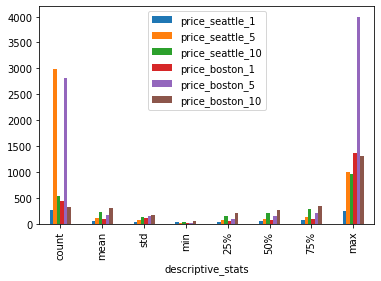

In [23]:
#Next create a data frame with all required descriptive stats to see how the different sizes of properties differ
#in price between locations
data = {'descriptive_stats': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
         'price_seattle_1': [256.00000, 58.375000, 28.285796, 25.000000, 40.000000, 50.000000, 65.000000, 250.000000],
         'price_seattle_5': [2994.00000, 112.399466, 62.218669, 20.000000, 75.000000, 99.000000, 135.000000, 1000.000000],
         'price_seattle_10': [541.00000, 234.353050, 126.489742, 38.000000, 150.000000, 200.000000, 285.000000, 950.000000],
         'price_boston_1': [439.000000, 85.507973, 104.699916, 20.000000, 48.000000, 65.000000, 90.000000, 1372.000000],
         'price_boston_5': [2806.000000 , 171.857448, 141.379880, 10.000000, 95.000000, 150.000000, 210.000000, 4000.000000],
         'price_boston_10': [326.000000  , 301.349693, 159.484652, 45.000000, 200.000000, 262.000000, 350.000000, 1300.000000]}
dfDescribePlot = pd.DataFrame(data)
print(dfDescribePlot)
dfDescribePlot.plot(x='descriptive_stats', y=['price_seattle_1', 'price_seattle_5', 'price_seattle_10', 'price_boston_1', 'price_boston_5', 'price_boston_10'], kind='bar')
plt.ioff()
plt.show()

In [24]:
t, p = sc.ttest_ind(dfSeattle1['price'], dfBoston1['price'], equal_var=False)
print("ttest_ind between 1 visitor:            t = %g  p = %g" % (t, p))

t, p = sc.ttest_ind(dfSeattle5['price'], dfBoston5['price'], equal_var=False)
print("ttest_ind between 2-5 visitor:            t = %g  p = %g" % (t, p))

t, p = sc.ttest_ind(dfSeattle10['price'], dfBoston10['price'], equal_var=False)
print("ttest_ind between 6-10 visitor:            t = %g  p = %g" % (t, p))

ttest_ind between 1 visitor:            t = -5.11889  p = 4.28051e-07
ttest_ind between 2-5 visitor:            t = -20.495  p = 1.25995e-88
ttest_ind between 6-10 visitor:            t = -6.45882  p = 2.26613e-10
